## Final Project Submission

Please fill out:
* Student name: Eli Gerber
* Student pace: full time
* Scheduled project review date/time: February 17, 2023
* Instructor name: Joe Mata
* Blog post URL:


# Data Cleaning

In [24]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.options.display.max_columns = None
pd.options.display.width = None

Let's start by loading our dataset.

In [25]:
# Your code here - remember to use markdown cells for comments as well!
hd = pd.read_csv('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/kc_house_data.csv')
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


There's a lot of information in here, but some of it may not be useful in its current form. It looks like the ZIP code for each listing is at the end of the address, so let's extract that to a new column.

In [26]:
hd['zip'] = hd.address.str[-20:-15]
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


Now that we have the ZIP code for each sale, we can make sure our dataset is limited to King County. We'll take a list of all ZIP codes for King County, locate records that do not have a ZIP code that matches any of the elements in that list, and remove those rows from our data.

In [27]:
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
zips

['98052',
 '98115',
 '98103',
 '98092',
 '98042',
 '98023',
 '98105',
 '98003',
 '98034',
 '98118',
 '98133',
 '98058',
 '98125',
 '98031',
 '98122',
 '98033',
 '98006',
 '98032',
 '98030',
 '98004',
 '98001',
 '98059',
 '98117',
 '98056',
 '98198',
 '98168',
 '98155',
 '98027',
 '98109',
 '98002',
 '98038',
 '98144',
 '98146',
 '98074',
 '98119',
 '98007',
 '98040',
 '98029',
 '98107',
 '98011',
 '98108',
 '98072',
 '98106',
 '98178',
 '98116',
 '98112',
 '98008',
 '98053',
 '98028',
 '98126',
 '98188',
 '98102',
 '98055',
 '98075',
 '98177',
 '98022',
 '98166',
 '98199',
 '98005',
 '98121',
 '98136',
 '98045',
 '98057',
 '98019',
 '98104',
 '98077',
 '98101',
 '98065',
 '98148',
 '98070',
 '98014',
 '98354',
 '98024',
 '98051',
 '98010',
 '98047',
 '98251',
 '98134',
 '98039',
 '98195',
 '98158',
 '98068',
 '98256',
 '98288',
 '98050',
 '98132',
 '98171',
 '98184',
 '98054',
 '98009',
 '98013',
 '98015',
 '98025',
 '98035',
 '98041',
 '98062',
 '98064',
 '98063',
 '98071',
 '98073',


In [28]:
wrong_zip = hd.loc[~hd['zip'].isin(zips)]

In [29]:
hd.drop(index = wrong_zip.index, inplace = True, axis = 0)

In [30]:
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


We should also check for and remove duplicate entries. We can do so using the 'id' column, which provides us with a unique identifer for each sale.

In [31]:
hd = hd.drop_duplicates(subset = ['id'])
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


We can also extract the year each listing was sold.

In [32]:
hd['year_sold'] = hd.date.str[-4:].astype(int)

<ipython-input-32-d11b8781c14c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['year_sold'] = hd.date.str[-4:].astype(int)


Now that each id is unique, we can drop that column from our data.

In [34]:
hd.drop(['id'], axis = 1, inplace = True)
hd

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,2022
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2021
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2021
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2021
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,2021
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,2021
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,2022
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,2022


Finally, let's determine how old each house was in 2022 (the last year for which we have data).

In [35]:
hd['years_old'] = 2022 - hd['yr_built']
hd.head()

<ipython-input-35-dc2405f92bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['years_old'] = 2022 - hd['yr_built']


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,2022,53
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2021,72
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2021,66
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2021,12
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2021,10


# Baseline Model

To construct our baseline model, we'll select the continuous numeric variable that has the highest correlation with sale price.

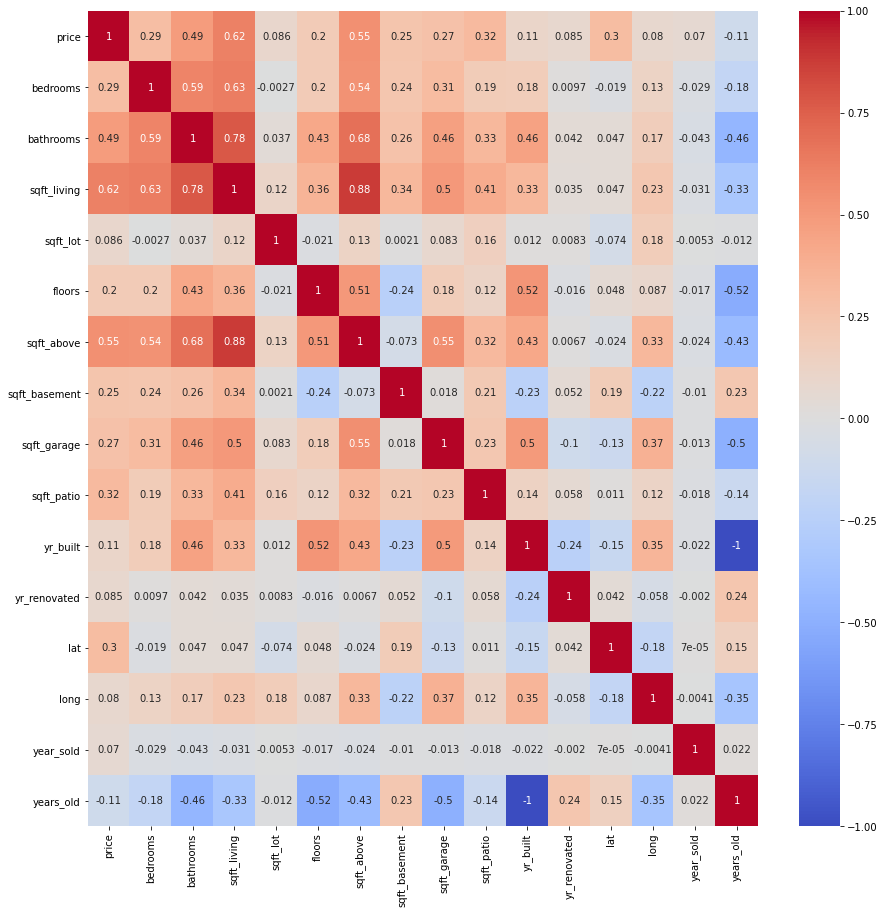

In [39]:
# create a heatmap of correlations
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(hd.corr(), annot = True, cmap = 'coolwarm');

In [38]:
# show correlations with price in an ordered list, starting with the highest correlation
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.616518
sqft_above       0.546001
bathrooms        0.487893
sqft_patio       0.317251
lat              0.297793
bedrooms         0.291082
sqft_garage      0.267658
sqft_basement    0.246320
floors           0.199915
years_old        0.106150
yr_built         0.106150
sqft_lot         0.085963
yr_renovated     0.085306
long             0.080210
year_sold        0.069819
Name: price, dtype: float64

It looks like square feet of living space has the highest correlation with sale price, which makes sense. Let's construct a simple linear regression to show that relationship.

In [45]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)

In [46]:
# separate the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} values")
print(f"y_train is a Series with {y_train.shape[0]} values")
print(f"X_test is a DataFrame with {X_test.shape[0]} values")
print(f"y_test is a Series with {y_test.shape[0]} values")

X_train is a DataFrame with 21910 values
y_train is a Series with 21910 values
X_test is a DataFrame with 7304 values
y_test is a Series with 7304 values


Now that we've split the data, we can create our baseline model using one of the variables.

In [47]:
# select sqft_living as predictor for baseline train and test
X_baseline_train = X_train[['sqft_living']]
X_baseline_test = X_test[['sqft_living']]

In [49]:
# instantiate the model
baseline_train_model = sm.OLS(y_train, sm.add_constant(X_baseline_train))

# fit the model and check results
baseline_train_results = baseline_train_model.fit()
baseline_train_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:28:15   Log-Likelihood:            -3.2646e+05
No. Observations:               21910   AIC:                         6.529e+05
Df Residuals:                   21908   BIC:                         6.529e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.99e+04   1.16e+04     -6.883      0.000   -1.03e+05   -5.71e+04
sqft_living   558.9078      4.961    112.649      0.000     549.183     568.633
==============================================================================
Omnibus:                    33424.639   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51082686.591
Skew:                           9.097   Prob(JB):                         0.00
Kurtosis:                     238.848   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## Checking assumptions for baseline model

In [ ]:
model_preds = baseline_results.predict()
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('predicted housing prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X_baseline['sqft_living'], y)
ax.set_title('Housing Price vs. Sq Ft Living Space');

# Type of Housing

In [ ]:
permits = pd.read_csv('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/Building_Permits.csv')
permits.head()

In [ ]:
permits['lat_long'] = list(zip(permits['Latitude'].round(3), permits['Longitude'].round(3)))
permits.head()

In [ ]:
hd.columns

In [ ]:
hd["lat_long"] = list(zip(hd['lat'].round(3), hd['long'].round(3)))
hd.head()

In [ ]:
hd_types = pd.merge(hd,permits[['PermitClass', 'lat_long']], on = 'lat_long', how='inner')
hd_types

In [ ]:
hd_types.drop_duplicates(subset = 'address', inplace = True)
hd_types

In [ ]:
hd_types['PermitClass'].value_counts()

In [ ]:
nonresidential = hd_types.loc[(hd_types['PermitClass'] != 'Single Family/Duplex') &
                              (hd_types['PermitClass'] != 'Multifamily')]
nonresidential

In [ ]:
hd_types.drop(index = nonresidential.index, inplace = True, axis = 0)

In [ ]:
hd_types = pd.get_dummies(hd_types, columns = ['PermitClass'])
hd_types.drop('PermitClass_Multifamily', axis = 1, inplace = True)
hd_types

In [ ]:
y = hd_types['price']
X_hd_types = hd_types[['sqft_living', 'PermitClass_Single Family/Duplex']]

hd_types_model = sm.OLS(y, sm.add_constant(X_hd_types))
hd_types_results = hd_types_model.fit()
hd_types_results.summary()

# Recursive Feature Elimination

In [ ]:
hd_types.head()

In [ ]:
hd_types_continuous = hd_types[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', \
                                'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', \
                                'yr_renovated', 'year_sold', 'years_old', 'PermitClass_Single Family/Duplex']]
hd_types_continuous

In [ ]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=5)

In [ ]:
ss = StandardScaler()
ss.fit(hd_types_continuous.drop(['price', 'PermitClass_Single Family/Duplex'], axis=1))

hd_types_scaled = ss.transform(hd_types_continuous.drop(['price', 'PermitClass_Single Family/Duplex'], axis=1))

In [ ]:
select.fit(X = hd_types_scaled, y = hd_types['price'])

In [ ]:
select.ranking_

In [ ]:
hd_types_continuous.drop('price', axis=1).columns

In [ ]:
X_rfe = hd_types[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above']]
y = hd_types['price']

X_rfe

In [ ]:
rfe_model = sm.OLS(y, sm.add_constant(X_rfe))
rfe_results = rfe_model.fit()
rfe_results.summary()